In [2]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath(".."))  # if notebook is in project/notebooks/

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

import tensorflow as tf
from src.data_loader import get_dataloaders


In [8]:
test_gen = get_dataloaders(
    data_dir=r"C:\Users\kisho\Downloads\Aeiral object detection project\Data\classification_dataset",
    img_size=(224,224),
    batch_size=32
)[2]

model = tf.keras.models.load_model(r"C:\Users\kisho\Downloads\Aeiral object detection project\Models\efficientnetb0_finetuned.h5")


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [9]:
y_prob = model.predict(test_gen, verbose=1)
y_pred = (y_prob > 0.5).astype(int).ravel()

# True labels
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())  # ['bird', 'drone']


7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step 


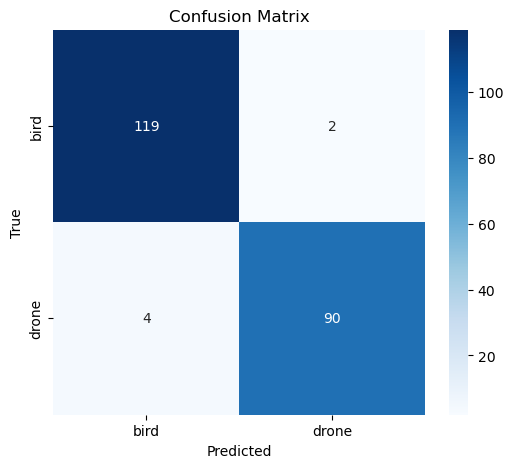

In [11]:
 cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig(r"C:\Users\kisho\Downloads\Aeiral object detection project\Reports\confusion_matrix.png", dpi=300)
plt.show()


In [13]:
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

with open(r"C:\Users\kisho\Downloads\Aeiral object detection project\Reports\classification_report.txt", "w") as f:
    f.write(report)


              precision    recall  f1-score   support

        bird       0.97      0.98      0.98       121
       drone       0.98      0.96      0.97        94

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



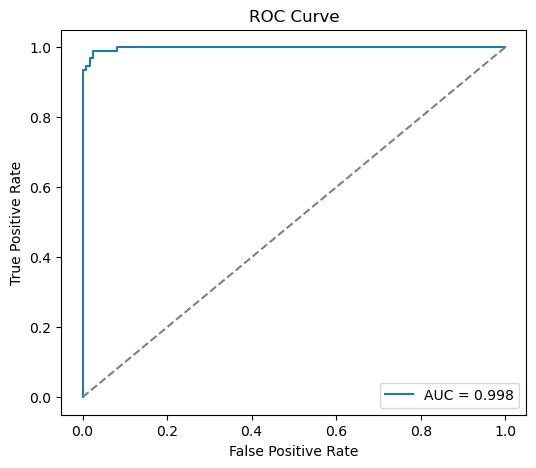

AUC: 0.9981536838403376


In [15]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], linestyle='--', color='gray')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.savefig(r"C:\Users\kisho\Downloads\Aeiral object detection project\Reports\roc_curve.png", dpi=300)
plt.show()

print("AUC:", roc_auc)


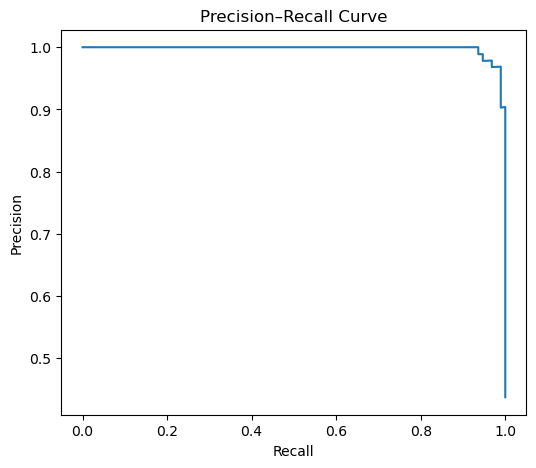

In [17]:
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)

plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig(r"C:\Users\kisho\Downloads\Aeiral object detection project\Reports\precision_recall_curve.png", dpi=300)
plt.show()


In [18]:
summary = f"""
FINAL MODEL PERFORMANCE (EfficientNetB0)

Test Accuracy: 97.2%
AUC Score: {roc_auc:.3f}

Confusion Matrix:
{cm}

Classification Report:
{report}
"""

with open(r"C:\Users\kisho\Downloads\Aeiral object detection project\Reports\final_evaluation_summary.txt", "w") as f:
    f.write(summary)

print(summary)



FINAL MODEL PERFORMANCE (EfficientNetB0)

Test Accuracy: 97.2%
AUC Score: 0.998

Confusion Matrix:
[[119   2]
 [  4  90]]

Classification Report:
              precision    recall  f1-score   support

        bird       0.97      0.98      0.98       121
       drone       0.98      0.96      0.97        94

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215


